<a href="https://colab.research.google.com/github/w3dip/sberbank_machine_learning/blob/master/Copy_of_Lab1_Linear_and_Ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Код взят из репозитория https://github.com/ml-mipt/ml-mipt

# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('https://github.com/ml-mipt/ml-mipt/raw/master/homeworks/Lab1_Linear_and_SVM/car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [7]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

0    1   2    3    4   5   6    7   ...   11   12   13  14  15  16   17   18
0   414   85  45   82  133  56  11  159  ...  170  362  173  76  10  21  183  193
1   493  102  54   98  177  56  10  219  ...  219  706  223  72   5  17  186  196
2   293   93  36   63  139  57   8  132  ...  158  260  121  67   3  27  193  201
3   417   96  36   74  183  70   6  149  ...  178  341  127  69   0  17  201  205
4   484   90  48   78  143  60  11  161  ...  172  374  186  75   2   2  184  193
5   791   86  43   68  150  64   9  138  ...  161  285  174  69   6   0  192  201
6    72   92  39   91  191  62   8  176  ...  196  466  151  67   3  23  192  200
7    47   85  42   66  122  54   6  148  ...  172  317  174  88   6  14  180  182
8   103   92  38   60  130  62   5  114  ...  135  194  137  72  14   5  190  194
9    66   81  43   68  125  57   8  149  ...  169  323  172  83   6  18  179  184
10  453   95  43   71  159  64   6  145  ...  169  322  171  67   8   4  195  200
11  491   97  45   76  175  60   9  157  ...  180  370  169  63  16  12  198  206
12   50   78  38   63  115  51   6  142  ...  162  299  146  77   2   4  181  185
13  447   95  57  104  228  74  10  212  ...  224  670  223  74   0   4  186  193
14  518   85  40   75  137  56   7  152  ...  173  339  160  76   7  16  182  187

[15 rows x 19 columns]

Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [8]:
X_train_pd.describe()

0           1           2   ...          16          17          18
count  549.000000  549.000000  549.000000  ...  549.000000  549.000000  549.000000
mean   427.528233   93.757741   44.754098  ...   13.071038  188.799636  195.573770
std    246.243251    8.079981    6.223015  ...    9.138455    6.057504    7.302167
min      1.000000   73.000000   33.000000  ...    0.000000  176.000000  181.000000
25%    221.000000   88.000000   40.000000  ...    6.000000  184.000000  191.000000
50%    431.000000   93.000000   44.000000  ...   11.000000  188.000000  197.000000
75%    636.000000   99.000000   49.000000  ...   19.000000  193.000000  201.000000
max    845.000000  119.000000   59.000000  ...   41.000000  204.000000  211.000000

[8 rows x 19 columns]

In [9]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.1. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

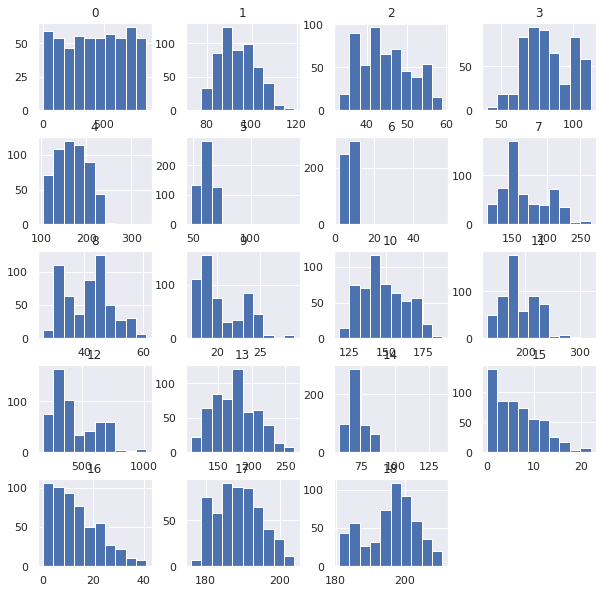

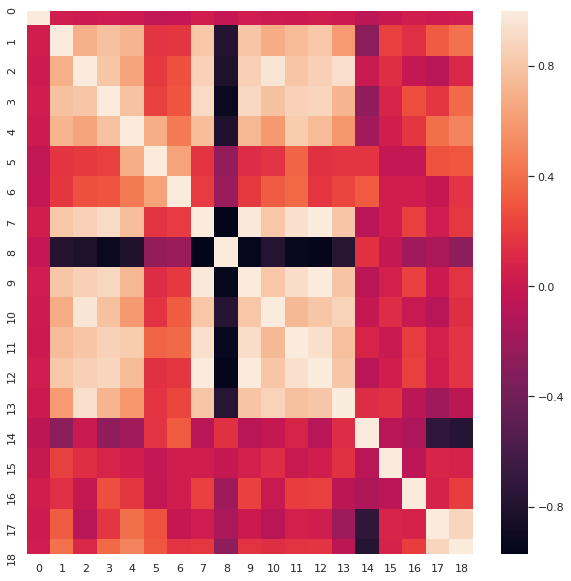

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# plotly library
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# посмотрим как распределены данные
_ = X_train_pd.hist(X_train_pd.columns, figsize=(10, 10))
# построим карту корелляции
_ = plt.subplots(figsize=(10, 10))
_ = sns.heatmap(X_train_pd.corr(), annot=False)

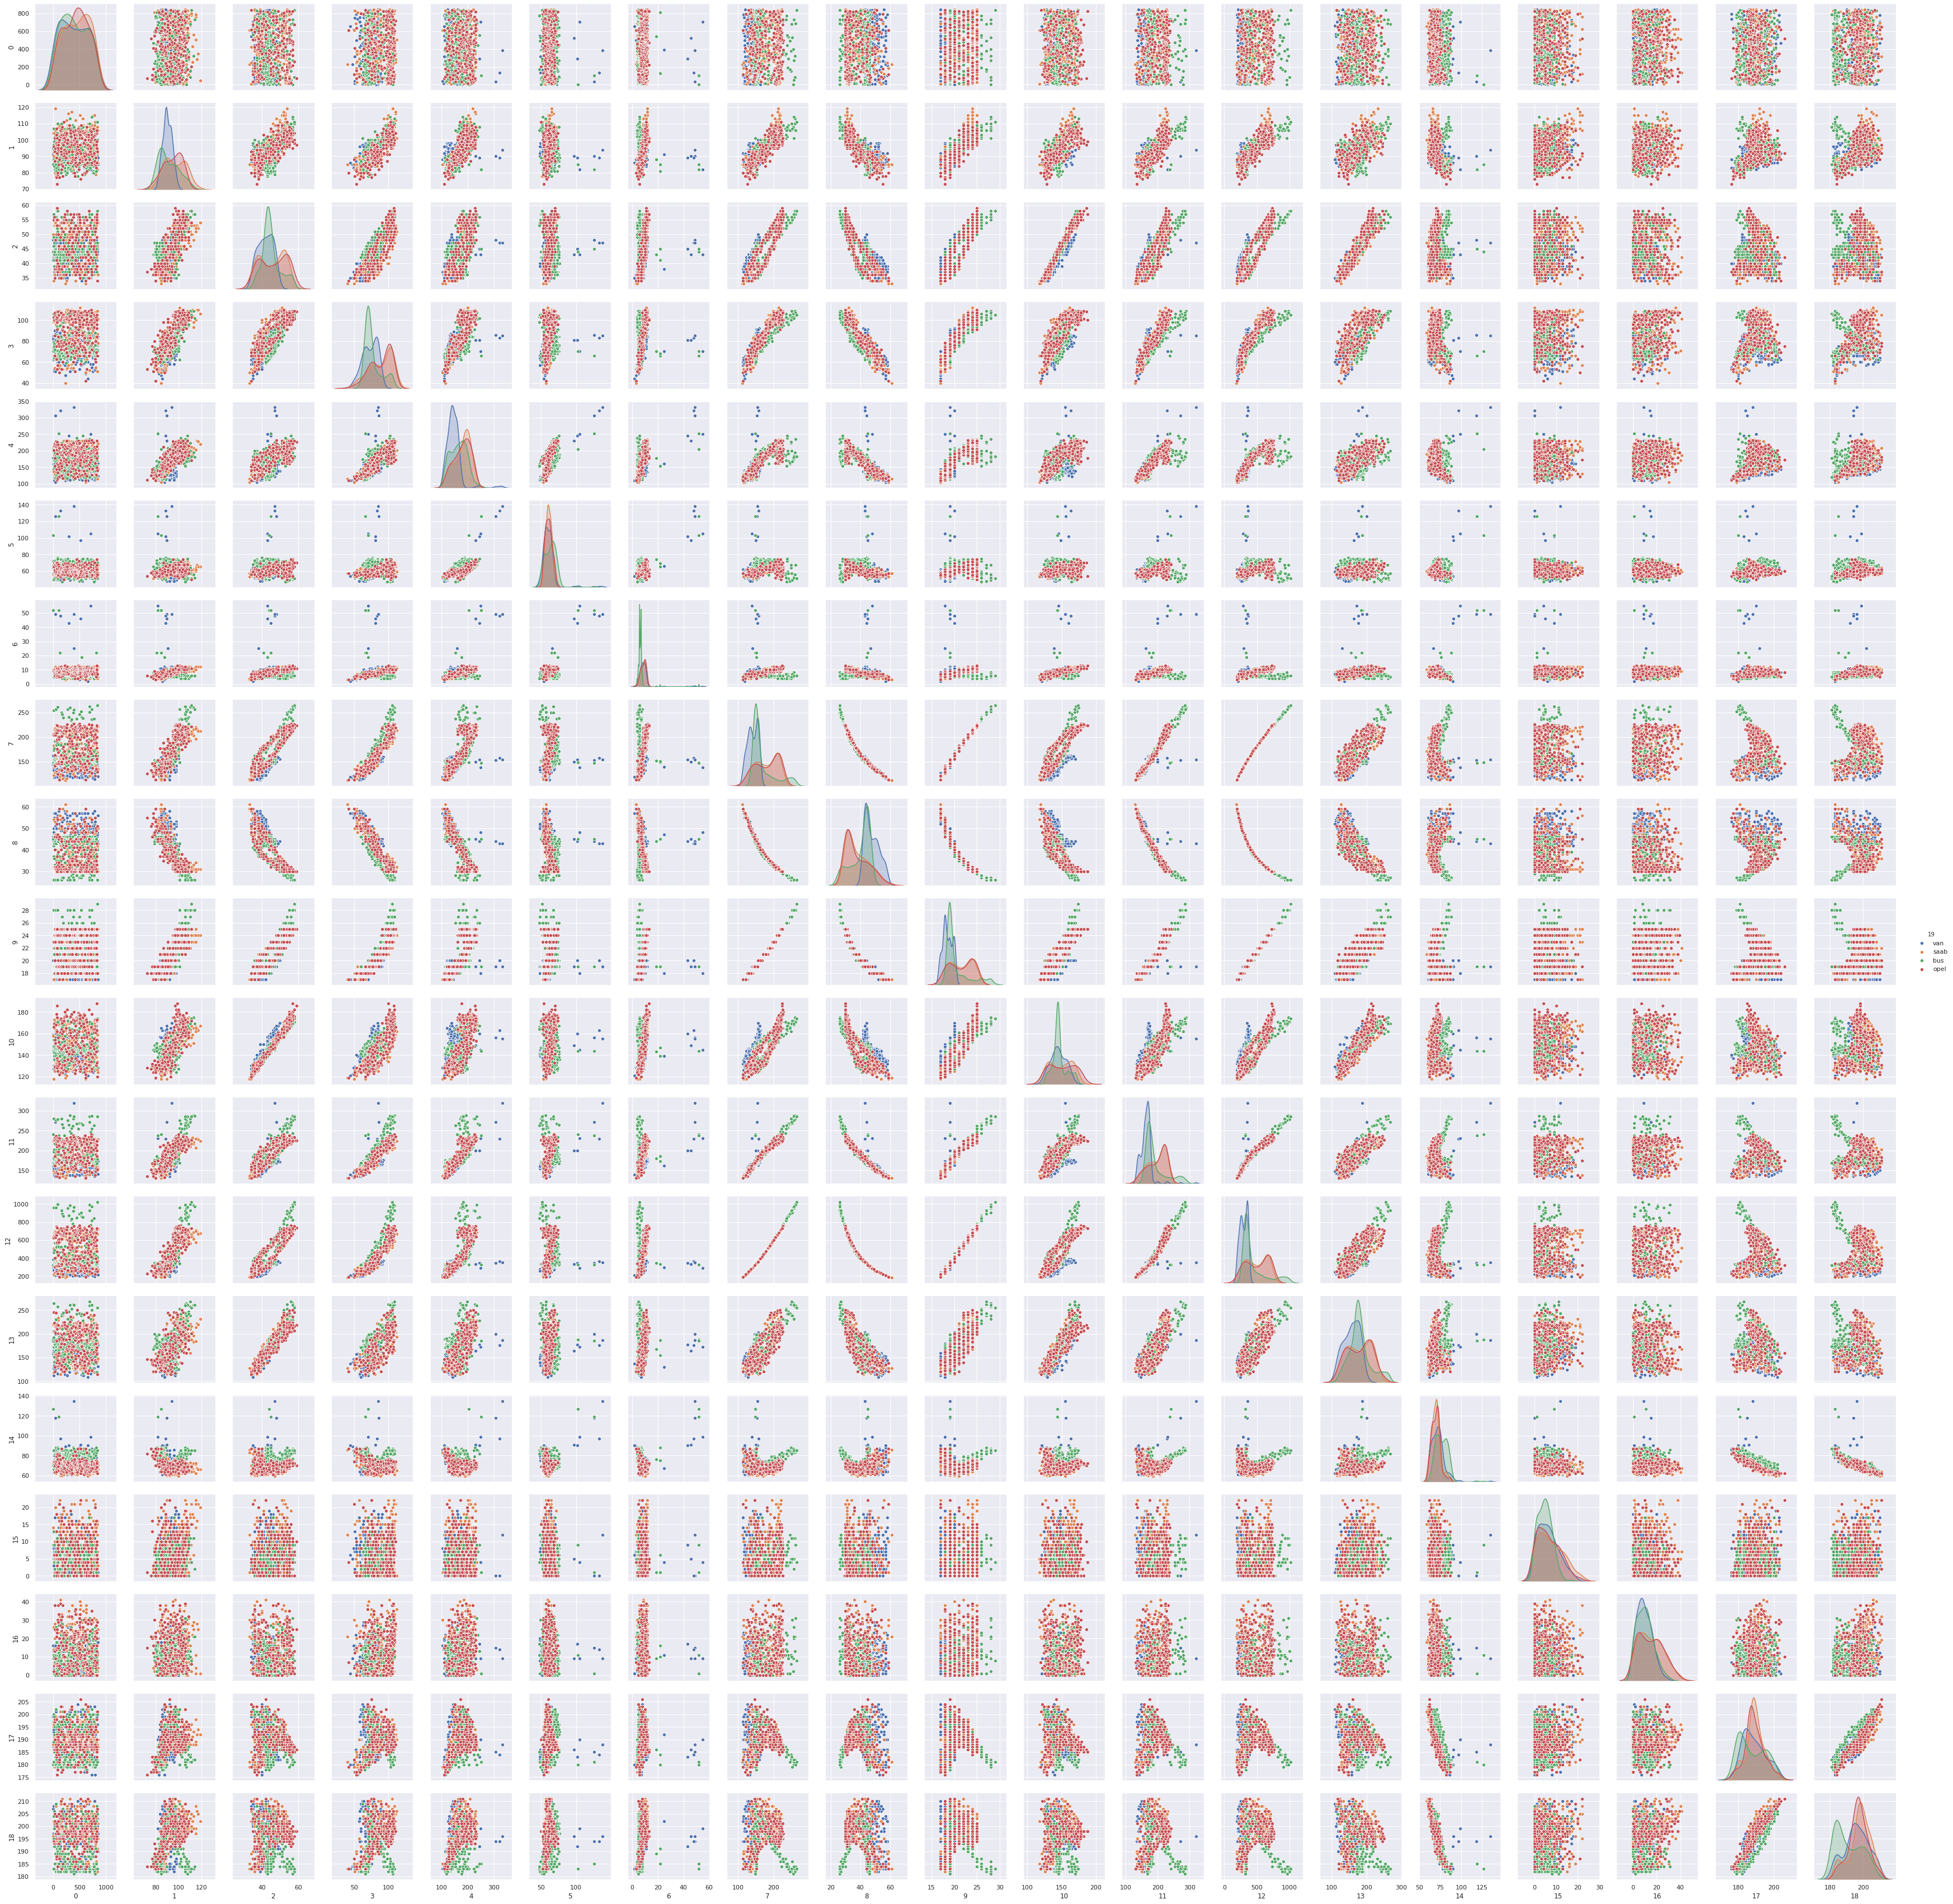

In [47]:
sns.pairplot(pd.DataFrame(dataset), hue=19)

In [109]:
# нормализуем данные, чтобы все признаки лежали в одном диапазоне
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

0         1         2   ...        16        17        18
0 -1.185261 -0.265514 -0.423938  ... -0.857417  0.005295  0.472944
1 -1.664904  0.724417  1.375192  ... -0.741046  0.328290  0.740621
2  0.216130  0.476934  1.702307  ...  1.353638 -0.479198  0.071429
3  0.374621  0.229451 -1.241725  ...  3.215580  1.135779  1.677490
4 -0.697277 -0.265514 -1.405282  ...  0.306296  0.974281  0.740621

[5 rows x 19 columns]

In [0]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
y_train = labelEncoder.fit_transform(y_train.reshape(-1,))
y_test = labelEncoder.transform(y_test.reshape(-1,))

#### 2.2. Логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [83]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='saga')
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)
print('Best params:', best_model.best_estimator_.get_params())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Best params: {'C': 21.544346900318832, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 5000, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Test accuracy:  0.7710437710437711
Test F measure:  0.7859517745977848


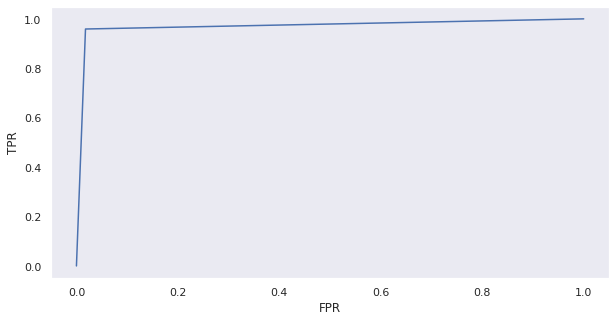

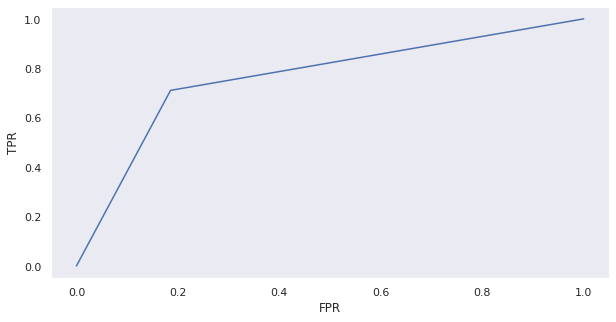

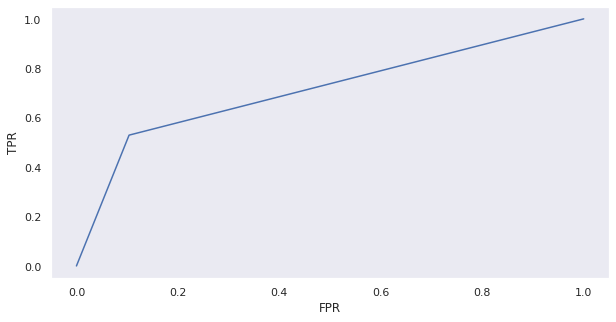

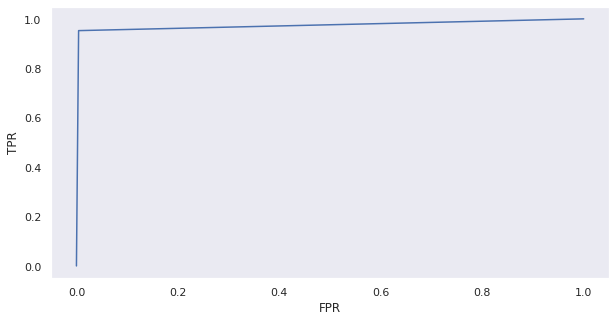

In [97]:
from sklearn.metrics import auc
y_pred = best_model.predict(X_test)

print('Test accuracy: ', accuracy_score(y_test, y_pred))
print('Test F measure: ', f1_score(y_test, y_pred, average='macro'))

for i in range(0, 4):
    class_test = np.where(y_test == i, 1, 0)
    class_pred = np.where(y_pred == i, 1, 0)
    fpr, tpr, _ = roc_curve(class_test.ravel(), class_pred.ravel())
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.show()

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

In [111]:
from sklearn.decomposition import PCA

model = PCA(n_components=12)
model.fit(X_train)
print(model.explained_variance_ratio_)

[0.49407994 0.16024376 0.10148898 0.06250404 0.05039871 0.0473882
 0.02897601 0.01887895 0.0123012  0.0086359  0.00488732 0.00312873]


In [0]:
model2 = PCA(n_components=9)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
y_train = labelEncoder.fit_transform(y_train.reshape(-1,))
y_test = labelEncoder.transform(y_test.reshape(-1,))

X_train = model2.fit_transform(X_train)
X_test = model2.transform(X_test)

#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [119]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='saga')
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)
print('Best params:', best_model.best_estimator_.get_params())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.6/dist-packages/sklearn/linea

Best params: {'C': 2.7825594022071245, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 5000, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Test accuracy:  0.6565656565656566
Test F measure:  0.656068979159133


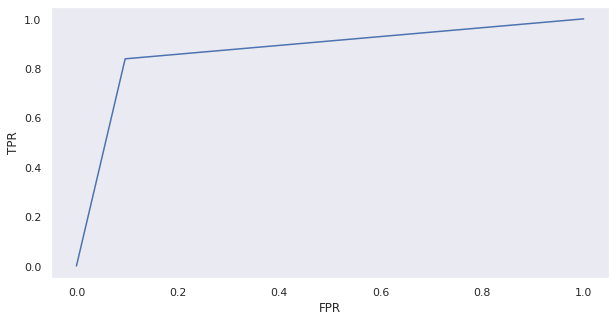

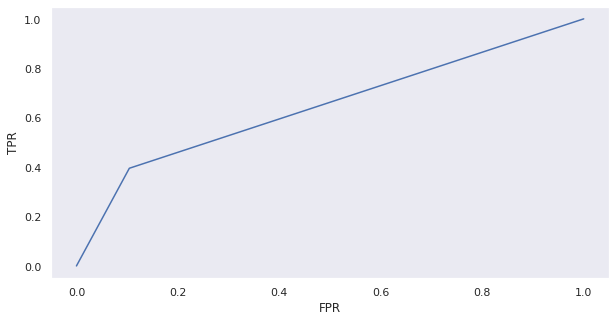

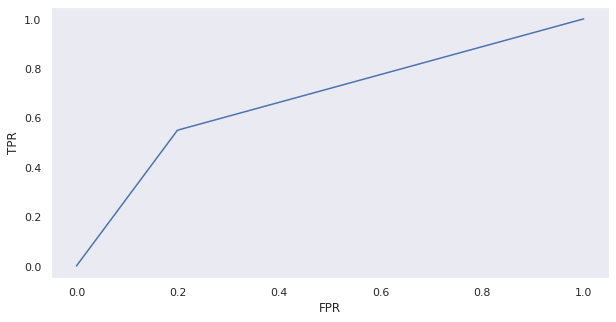

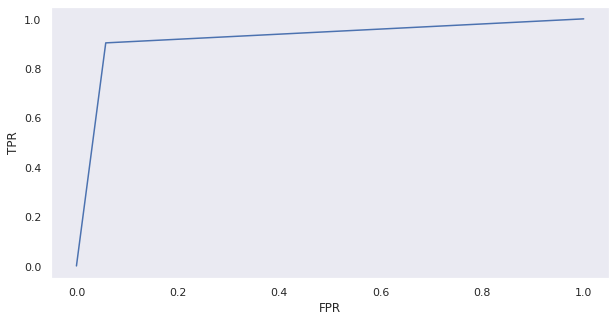

In [120]:
from sklearn.metrics import auc
y_pred = best_model.predict(X_test)

print('Test accuracy: ', accuracy_score(y_test, y_pred))
print('Test F measure: ', f1_score(y_test, y_pred, average='macro'))

for i in range(0, 4):
    class_test = np.where(y_test == i, 1, 0)
    class_pred = np.where(y_pred == i, 1, 0)
    fpr, tpr, _ = roc_curve(class_test.ravel(), class_pred.ravel())
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.show()

#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [129]:
from sklearn.tree import DecisionTreeClassifier

treeModel = DecisionTreeClassifier()
hyperparameters = {'max_depth':np.arange(2, 100, 2)}

clf = GridSearchCV(treeModel, hyperparameters, cv=5, verbose=0)
tree_best_model = clf.fit(X_train, y_train)
print(tree_best_model.best_estimator_.get_params())

{'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Test accuracy:  0.5791245791245792
Test F measure:  0.5708588076149792


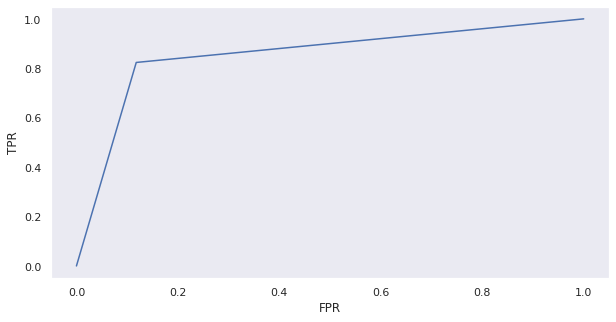

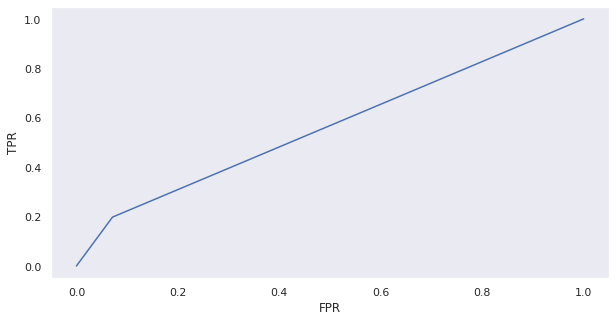

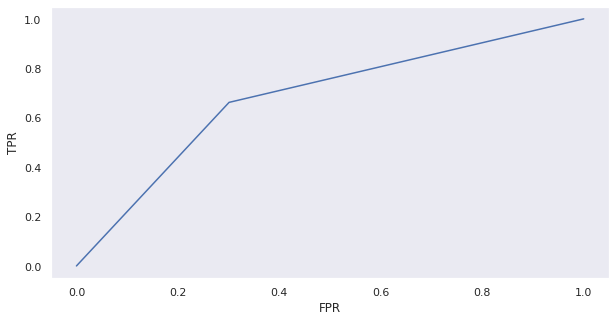

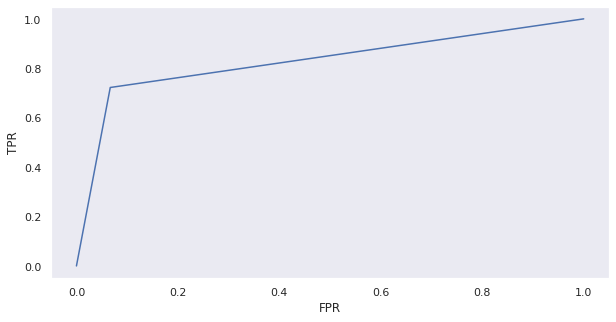

In [130]:
from sklearn.metrics import auc
y_pred = tree_best_model.predict(X_test)

print('Test accuracy: ', accuracy_score(y_test, y_pred))
print('Test F measure: ', f1_score(y_test, y_pred, average='macro'))

for i in range(0, 4):
    class_test = np.where(y_test == i, 1, 0)
    class_pred = np.where(y_pred == i, 1, 0)
    fpr, tpr, _ = roc_curve(class_test.ravel(), class_pred.ravel())
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.show()

#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False 

Test accuracy:  0.67003367003367
Test F measure:  0.6712973965547332


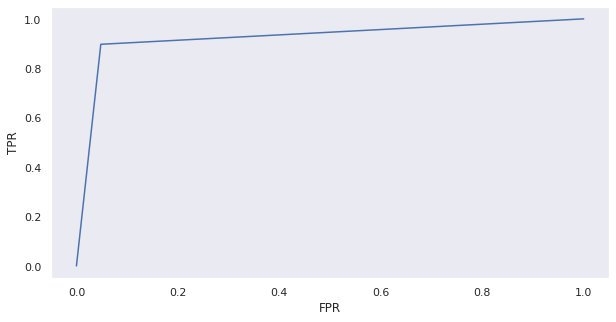

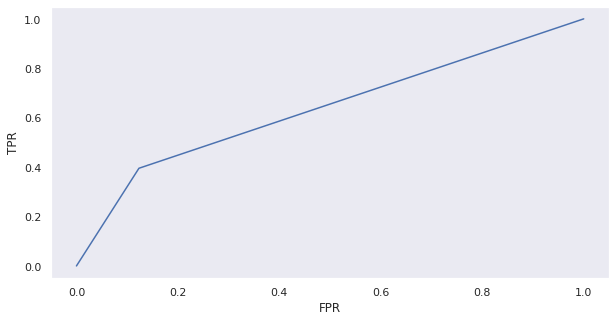

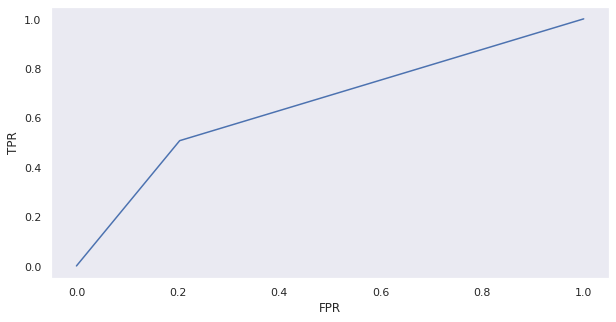

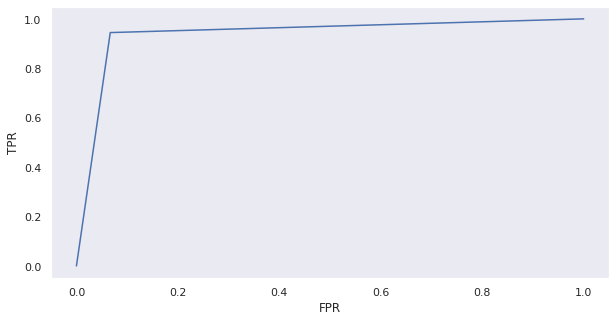

In [132]:
from sklearn.ensemble import BaggingClassifier
baglog = BaggingClassifier(best_model, n_estimators=50)
baglog.fit(X_train, y_train)

from sklearn.metrics import auc
y_pred = baglog.predict(X_test)

print('Test accuracy: ', accuracy_score(y_test, y_pred))
print('Test F measure: ', f1_score(y_test, y_pred, average='macro'))

for i in range(0, 4):
    class_test = np.where(y_test == i, 1, 0)
    class_pred = np.where(y_pred == i, 1, 0)
    fpr, tpr, _ = roc_curve(class_test.ravel(), class_pred.ravel())
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False 

Test accuracy:  0.696969696969697
Test F measure:  0.7023667094080247


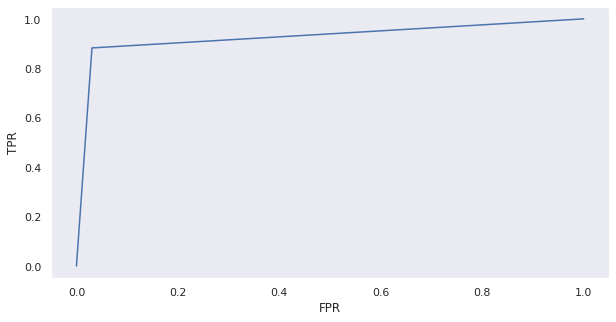

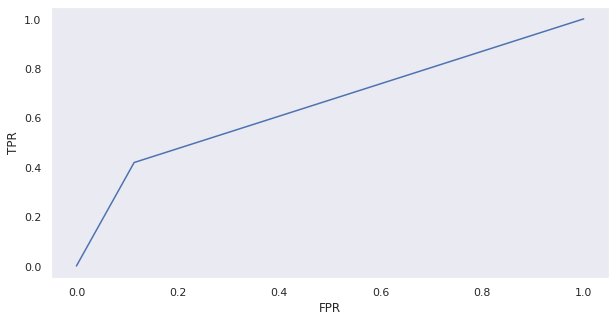

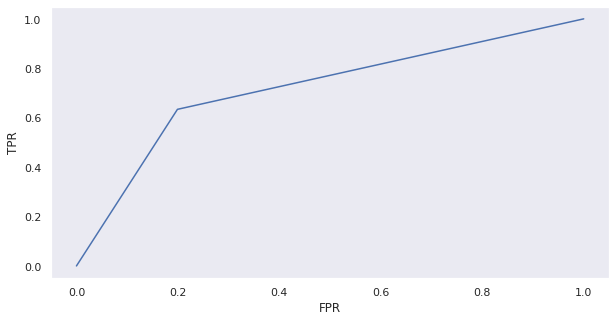

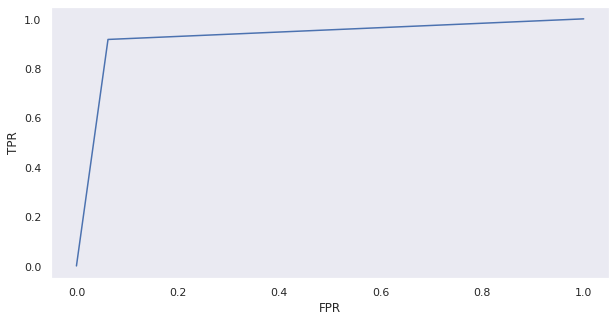

In [134]:
from sklearn.ensemble import BaggingClassifier
bagtree = BaggingClassifier(tree_best_model, n_estimators=50)
bagtree.fit(X_train, y_train)

from sklearn.metrics import auc
y_pred = bagtree.predict(X_test)

print('Test accuracy: ', accuracy_score(y_test, y_pred))
print('Test F measure: ', f1_score(y_test, y_pred, average='macro'))

for i in range(0, 4):
    class_test = np.where(y_test == i, 1, 0)
    class_pred = np.where(y_pred == i, 1, 0)
    fpr, tpr, _ = roc_curve(class_test.ravel(), class_pred.ravel())
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.show()

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

In [136]:
from sklearn.ensemble import RandomForestClassifier

forestModel = RandomForestClassifier()
hyperparameters = {'max_depth':np.arange(1, 50, 1)}

clf = GridSearchCV(forestModel, hyperparameters, cv=5, verbose=0)
forest_best_model = clf.fit(X_train, y_train)
print(forest_best_model.best_estimator_.get_params())

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will chan

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 31, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

/usr/local/lib/python3.6/d

Test accuracy:  0.6767676767676768
Test F measure:  0.6802222299025368


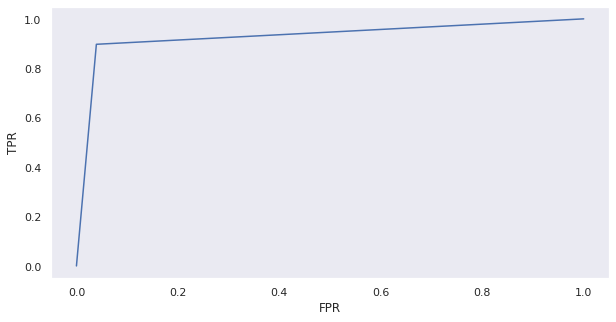

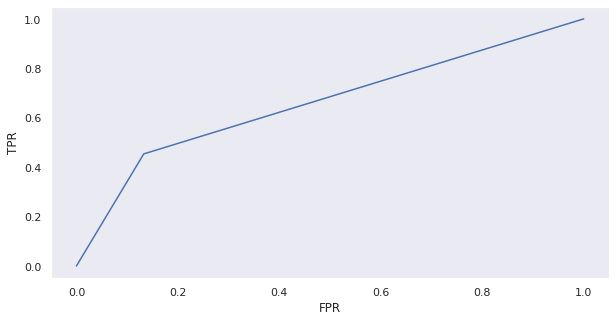

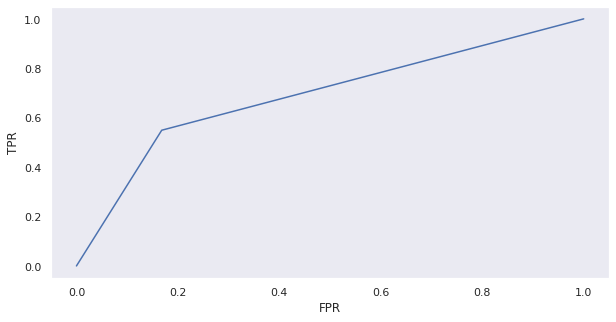

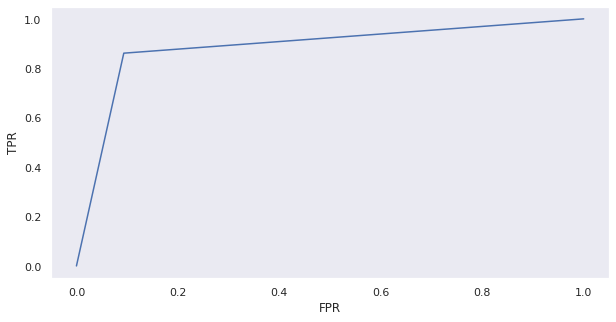

In [137]:
from sklearn.metrics import auc
y_pred = forest_best_model.predict(X_test)

print('Test accuracy: ', accuracy_score(y_test, y_pred))
print('Test F measure: ', f1_score(y_test, y_pred, average='macro'))

for i in range(0, 4):
    class_test = np.where(y_test == i, 1, 0)
    class_pred = np.where(y_pred == i, 1, 0)
    fpr, tpr, _ = roc_curve(class_test.ravel(), class_pred.ravel())
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.show()

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [0]:
y_train_batch
y_train[i:i+step]
rom sklearn.metrics import accuracy_score
f1_scores = {'logreg': [],
             'tree': [],
             'random_forest': [],
             'logreg_bagging': [],
             'tree_bagging': []}

acc_scores = {'logreg': [],
             'tree': [],
             'random_forest': [],
             'logreg_bagging': [],
             'tree_bagging': []}

step = X_train.shape[0] // 10
X_train_batch, y_train_batch = np.ndarray(shape=(0, X_train.shape[1])), np.ndarray(shape=(0, 1))
for i in range(step, 10 * step, step):
    X_train_batch = np.vstack([X_train_batch, X_train[i:i+step, :]])
    y_train_batch = np.vstack([y_train_batch, y_train[i:i+step, np.newaxis]])
    
    rf = RandomForestClassifier(**forest_best_model.best_estimator_.get_params())
    b_tree = BaggingClassifier(DecisionTreeClassifier(**tree_best_model.best_estimator_.get_params()), n_estimators=30,
                               max_samples=1.0, max_features=0.5)
    tree = DecisionTreeClassifier(**tree_best_model.best_estimator_.get_params)
    lr = LogisticRegression(**best_model.best_estimator_.get_params)
    b_lr =  BaggingClassifier(LogisticRegression(**best_model.best_estimator_.get_params), n_estimators=50,
                            max_samples=1.0, max_features=0.5)

    models = [rf, b_tree, lr, b_lr, tree]
    for index, model in enumerate(models):
        model.fit(X_train_batch, y_train_batch)
        preds = model.predict(X_test)
        score_f1 = f1_score(y_test, preds, average='micro')
        acc = accuracy_score(y_test, preds)
        
        label = None
        if index == 0:
            label = 'random_forest'
        elif index == 1:
            label = 'tree_bagging'
        elif index == 2:
            label = 'logreg'
        elif index == 3:
            label = 'logreg_bagging'
        elif index == 4:
            label = 'tree'
            
        f1_scores[label] += [score_f1]
        acc_scores[label] += [acc]

Вторая часть задания про SVM ждет вас в соседнем ноутбуке.